<a href="https://colab.research.google.com/github/rgprado/Mineracao_de_Texto_na_Web_Coleta_de_Dados/blob/main/Atividade_1_e_2_Coleta_de_dados_na_Web%2C_Pr%C3%A9_processamento_e_Extra%C3%A7%C3%A3o_de_Caracter%C3%ADsticas_do_Texto_Rodrigo_Prado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Coleta de dados na Web, Pré processamento e Extração de Características do Texto##
Professor: Leonardo Valeriano Neri

Aluno: Rodrigo Prado

Atividade 1 e 2


In [1]:
!pip install beautifulsoup4
!conda activate NLP
!pip install nltk
!pip install --upgrade gensim
!pip install sklearn
!pip install Unidecode
!pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.22.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.0 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.0 which is incompatible.


## Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import json
from typing import List
import os.path
from os import path

import os
import glob
import re
from unidecode import unidecode

from bs4 import BeautifulSoup
import requests
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfTransformer

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Função para criar os diretórios para salvar os arquivos extraidos

In [3]:
def create_json_directory(path: str):
  output_path = "output"

  if not os.path.exists(output_path):
    os.makedirs(output_path)

  if not os.path.exists(output_path + '/' + path):
    os.makedirs(output_path + '/' + path)
  else:
    print("Path already exists")

## Função para Coleta de dados na Web

In [4]:
def read_page_get_links(keywords: str) -> list:
    response = requests.get("https://repositorio.ufpe.br/simple-search?location=123456789%2F50&query={}".format(keywords))
    soup = BeautifulSoup(response.text.strip(), 'html.parser')
    tags = soup.find_all(name='table')
    tag_table = tags[0]
    tags_a = tag_table.find_all(name='a')
    
    urls = []
    
    for i in range(0, len(tags_a), 2): 
        link = tags_a[i]["href"]
        urls.append(link)
    
    return urls

## Função para Leitura do titulo e abstract

In [5]:
def read_table_get_title_and_abstract(info_table: List[str]) -> dict:
    all_titles = info_table.find_all(name='td', attrs={'class': 'dc_title'})
    title = all_titles[-1].contents[0]

    all_abst = info_table.find_all(name='td', attrs={'class': 'dc_description_abstract'})
    abst = all_abst[-1].contents[0]

    dict_thesis_info = {}
    dict_thesis_info = {
        'title': title,
        'abstract': abst,
    }

    return dict_thesis_info

## Função para Criar uma tabela com todos os artigos

In [6]:
def create_tables(urls):
  info_table = []

  for url in urls:
      response = requests.get(f'https://repositorio.ufpe.br/{url}', allow_redirects=True)
      soup = BeautifulSoup(response.text.strip(), 'html.parser')
      tags_table = soup.find_all(name='table', attrs={'class': 'itemDisplayTable'})
      info_table.append(tags_table[0])

  return info_table

## Função para Salvar todos os artigos por tema no diretório

In [7]:
def create_output_folder(topic: str, info_table):
  counter = 1

  create_json_directory(topic)

  for table in info_table:
      output = read_table_get_title_and_abstract(table)
      
      # Criar a estrutura de pastas antes de executar a celula
      with open(f"./output/{topic}/thesis{counter}.json", 'w') as json_file:
          json.dump(output, json_file, ensure_ascii=False) #TODO: Automatizar a criação das pastas
          
      counter = counter + 1

## Escolha dos temas a serem pesquisados

In [8]:
topic_list = ["machine+learning", "economia", "estatistica", "historia", "biologia"]

all_urls = []

for topic in topic_list:
  urls = read_page_get_links(topic)
  info_table = create_tables(urls)
  create_output_folder(topic, info_table)

Path already exists
Path already exists
Path already exists
Path already exists
Path already exists


In [9]:
path = os.getcwd()
files = glob.glob(os.path.join(path, "output/*/*.json"))

In [10]:
jsons = [pd.read_json(file, lines=True) for file in files]
thesis = pd.concat(jsons, ignore_index=True)

thesis["subject"] = [os.path.split(os.path.dirname(file))[-1] for file in files]

In [11]:
thesis

,title,abstract,subject
0,A difusão de empresas de economia de comunhão ...,Gerir uma empresa em um ambiente dinâmico e de...,economia
1,Precificação dos recursos ambientais : condiçã...,A concepção desse trabalho parte do entendimen...,economia
2,Uma abordagem da economia de comunhão como es...,O TCM Uma abordagem da Economia de Comunhão c...,economia
3,Política pública de economia solidária no Bras...,Este trabalho objetiva analisar os determinant...,economia
4,A economia digital e o comércio eletrônico : ...,Apresenta-se e discute-se a Revolução e a Tecn...,economia
5,Economia compartilhada de moda e sustentabilid...,A presente dissertação tem como objetivo geral...,economia
6,Uma análise das desigualdades dos estados bras...,A evolução das desigualdades entre as economia...,economia
7,Prestação de serviços de natureza comunitária ...,Esta dissertação procura refletir sobre uma da...,economia
8,Competitividade do setor exportador da economi...,O objetivo desta pesquisa é analisar a competi...,economia
9,Outra economia acontece? A economia solidária ...,O objetivo desta tese é analisar e interpretar...,economia


## Definição das StopWords

In [12]:
languages = ['english', 'portuguese']
list_stop = stopwords.words(languages)
print('Both languages Stop Words', list_stop)

Both languages Stop Words ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own

In [13]:
texto = ''
for doc in thesis[:1].iterrows():
  texto = doc[1]['title'] + ' ' + doc[1]['abstract']

print(texto)
print(thesis[:1]['abstract'])

A difusão de empresas de economia de comunhão no mercado sob a ótica da teoria dos jogos Gerir uma empresa em um ambiente dinâmico e de mudanças rápidas é uma tarefa
desafiadora. No cenário atual a cada dia surgem novas empresas, enquanto que outras vão à
falência. Em paralelo a este fato, percebe-se o agravamento das desigualdades sociais, e que a
grande maioria das inovações tecnológicas contribuiu para melhorar a qualidade de vida de um
grupo bastante restrito de pessoas, enquanto que a maior parte delas encontra-se em condições
desfavoráveis. Neste contexto, em 1991 surgiu a Economia de Comunhão (EdC), formada por
empresas que, dentre outras características, utilizam seus lucros para diminuir as desigualdades
sociais, através da ajuda e formação de pessoas necessitadas.
Neste trabalho se faz um estudo do ponto de vista de Teoria dos Jogos de como tem sido a
inserção destas empresas no mercado com relação aos seus concorrentes e clientes, no sentido de
se compreender se o processo d

In [14]:
documents_tokens = []
vocabulary = set()
for article in thesis.iterrows():
  doc = article[1]['title'] + ' ' + article[1]['abstract']
  doc_tokens = [
    token.lower() # pre processamento: todas as letras ficam minúsculas
      for token in word_tokenize(doc, language='portuguese') # tokenizador para o idioma inglês a nível de palavras
        if not token.lower() in list_stop and token.isalnum() # excluir tokens na lista "stop" e símbolos
  ]

  vocabulary.update(set(doc_tokens))
  documents_tokens.append(doc_tokens)

In [15]:
len(vocabulary)

3412

In [16]:
documents_tokens[0]

['difusão',
 'empresas',
 'economia',
 'comunhão',
 'mercado',
 'sob',
 'ótica',
 'teoria',
 'jogos',
 'gerir',
 'empresa',
 'ambiente',
 'dinâmico',
 'mudanças',
 'rápidas',
 'tarefa',
 'desafiadora',
 'cenário',
 'atual',
 'cada',
 'dia',
 'surgem',
 'novas',
 'empresas',
 'enquanto',
 'outras',
 'vão',
 'falência',
 'paralelo',
 'fato',
 'agravamento',
 'desigualdades',
 'sociais',
 'grande',
 'maioria',
 'inovações',
 'tecnológicas',
 'contribuiu',
 'melhorar',
 'qualidade',
 'vida',
 'grupo',
 'bastante',
 'restrito',
 'pessoas',
 'enquanto',
 'maior',
 'parte',
 'condições',
 'desfavoráveis',
 'neste',
 'contexto',
 '1991',
 'surgiu',
 'economia',
 'comunhão',
 'edc',
 'formada',
 'empresas',
 'dentre',
 'outras',
 'características',
 'utilizam',
 'lucros',
 'diminuir',
 'desigualdades',
 'sociais',
 'através',
 'ajuda',
 'formação',
 'pessoas',
 'necessitadas',
 'neste',
 'trabalho',
 'faz',
 'estudo',
 'ponto',
 'vista',
 'teoria',
 'jogos',
 'sido',
 'inserção',
 'destas',
 'e

In [17]:
print(thesis[:1])
pre_processed_documents = [' '.join(doc) for doc in documents_tokens]
print(pre_processed_documents[0])

                                               title  \
0  A difusão de empresas de economia de comunhão ...   

                                            abstract   subject  
0  Gerir uma empresa em um ambiente dinâmico e de...  economia  
difusão empresas economia comunhão mercado sob ótica teoria jogos gerir empresa ambiente dinâmico mudanças rápidas tarefa desafiadora cenário atual cada dia surgem novas empresas enquanto outras vão falência paralelo fato agravamento desigualdades sociais grande maioria inovações tecnológicas contribuiu melhorar qualidade vida grupo bastante restrito pessoas enquanto maior parte condições desfavoráveis neste contexto 1991 surgiu economia comunhão edc formada empresas dentre outras características utilizam lucros diminuir desigualdades sociais através ajuda formação pessoas necessitadas neste trabalho faz estudo ponto vista teoria jogos sido inserção destas empresas mercado relação concorrentes clientes sentido compreender processo adesão edc sido 

In [18]:
custom_list_stop = []
for v in list(vocabulary):
  if len(v) == 1 or len(v) == 2:
    custom_list_stop.append(v)

custom_list_stop = custom_list_stop + ['xterm', 'x11r5', 'x11', 'xlib', 'vax', 'uwo', 'pl8', 'pl9']
print(custom_list_stop)

del documents_tokens
del vocabulary
documents_tokens = []
vocabulary = set()
for doc in pre_processed_documents:
    tokens = [token for token in word_tokenize(doc, language='portuguese') if not token in custom_list_stop]
    documents_tokens.append(tokens)
    vocabulary.update(set(tokens))

print('Tamanho do novo vocabulário: ', len(vocabulary))

del pre_processed_documents
pre_processed_documents = [' '.join(doc) for doc in documents_tokens]

['78', 'aí', 'l', '2', 'cd', 'dá', 'x', 'es', 'nº', '10', '80', 'vi', 'pe', '9', '1º', '17', '57', 'wi', '15', '13', 't2', 'cp', '3', '85', '11', 'b', 'ee', 'sp', 'sm', '60', '5', '16', 'rc', '32', 'z', 'á', '3º', 'lm', 'lc', '4', 'ps', '30', '65', 'k', '1', 'pp', 'c', '48', 'lt', 'ex', '55', 'si', 'ml', 'dl', '90', '70', 'pi', '37', 'sd', 'f1', '8', 'rs', 'ás', '2º', '45', 'br', 'xterm', 'x11r5', 'x11', 'xlib', 'vax', 'uwo', 'pl8', 'pl9']
Tamanho do novo vocabulário:  3346


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words=list_stop, min_df=0.005, max_df=0.5, max_features=1000)
count_vect.fit(pre_processed_documents)

CountVectorizer(max_df=0.5, max_features=1000, min_df=0.005,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [20]:
print('Tamanho do vocabulário: ', len(count_vect.vocabulary_))
counter = 0
for _, count in count_vect.vocabulary_.items():
    counter += count
    
print('Quantidade total de palavras: ', counter)

Tamanho do vocabulário:  1000
Quantidade total de palavras:  499500


In [21]:
sorted(count_vect.vocabulary_.items(), reverse=True)

[('única', 999),
 ('óvulos', 998),
 ('ótica', 997),
 ('ênfase', 996),
 ('ética', 995),
 ('âmbito', 994),
 ('áreas', 993),
 ('área', 992),
 ('zoologia', 991),
 ('xukuru', 990),
 ('work', 989),
 ('web', 988),
 ('way', 987),
 ('vídeo', 986),
 ('vários', 985),
 ('várias', 984),
 ('visão', 983),
 ('visto', 982),
 ('vista', 981),
 ('visitas', 980),
 ('visitantes', 979),
 ('vinte', 978),
 ('vinculadas', 977),
 ('vida', 976),
 ('viabilidade', 975),
 ('via', 974),
 ('vez', 973),
 ('versões', 972),
 ('vector', 971),
 ('valores', 970),
 ('valor', 969),
 ('utilização', 968),
 ('utilizamos', 967),
 ('utilizam', 966),
 ('utilizados', 965),
 ('utilizadas', 964),
 ('utilizada', 963),
 ('usually', 962),
 ('uso', 961),
 ('using', 960),
 ('used', 959),
 ('urbanos', 958),
 ('universidade', 957),
 ('unified', 956),
 ('ufpe', 955),
 ('típica', 954),
 ('têm', 953),
 ('técnicos', 952),
 ('técnicas', 951),
 ('two', 950),
 ('turmas', 949),
 ('turma', 948),
 ('três', 947),
 ('trigona', 946),
 ('treinamento', 945

In [22]:
count_vect.vocabulary_.items()

dict_items([('empresas', 314), ('economia', 301), ('comunhão', 181), ('mercado', 564), ('sob', 875), ('ótica', 997), ('teoria', 910), ('empresa', 313), ('ambiente', 42), ('tarefa', 900), ('atual', 100), ('cada', 141), ('dia', 263), ('novas', 621), ('enquanto', 329), ('outras', 650), ('fato', 403), ('desigualdades', 251), ('sociais', 877), ('grande', 459), ('maioria', 542), ('qualidade', 780), ('vida', 976), ('grupo', 461), ('pessoas', 686), ('maior', 540), ('parte', 654), ('neste', 614), ('contexto', 204), ('1991', 1), ('edc', 305), ('dentre', 238), ('características', 148), ('utilizam', 966), ('através', 98), ('formação', 431), ('trabalho', 931), ('faz', 404), ('estudo', 380), ('ponto', 703), ('vista', 981), ('sido', 866), ('inserção', 499), ('destas', 257), ('relação', 825), ('sentido', 855), ('compreender', 176), ('processo', 747), ('desenvolvimento', 249), ('deste', 258), ('modo', 584), ('analisar', 46), ('perspectivas', 680), ('projeto', 758), ('revisão', 839), ('literatura', 531)

In [23]:
X = count_vect.transform(pre_processed_documents)

In [24]:
X.shape

(50, 1000)

In [25]:
print(X[0,:])

  (0, 1)	1
  (0, 42)	1
  (0, 46)	1
  (0, 49)	1
  (0, 52)	1
  (0, 92)	1
  (0, 98)	1
  (0, 100)	1
  (0, 127)	1
  (0, 141)	1
  (0, 148)	2
  (0, 152)	1
  (0, 157)	1
  (0, 176)	1
  (0, 181)	2
  (0, 204)	1
  (0, 238)	1
  (0, 243)	1
  (0, 249)	2
  (0, 251)	2
  (0, 257)	1
  (0, 258)	1
  (0, 263)	1
  (0, 301)	2
  (0, 305)	2
  :	:
  (0, 747)	1
  (0, 758)	4
  (0, 779)	1
  (0, 780)	1
  (0, 791)	1
  (0, 802)	1
  (0, 808)	1
  (0, 809)	2
  (0, 820)	1
  (0, 825)	1
  (0, 839)	1
  (0, 855)	1
  (0, 866)	2
  (0, 868)	1
  (0, 875)	1
  (0, 876)	1
  (0, 877)	2
  (0, 900)	1
  (0, 910)	2
  (0, 923)	1
  (0, 931)	1
  (0, 966)	1
  (0, 976)	1
  (0, 981)	1
  (0, 997)	1


In [26]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X)

TfidfTransformer()

In [27]:
X_tfidf = tfidf_transformer.transform(X)
print(X_tfidf[0,:])

  (0, 997)	0.08496357102942043
  (0, 981)	0.07858706807934374
  (0, 976)	0.06061271579544726
  (0, 966)	0.07858706807934374
  (0, 931)	0.03796771001418114
  (0, 923)	0.07858706807934374
  (0, 910)	0.14728213627757472
  (0, 900)	0.08496357102942043
  (0, 877)	0.16992714205884085
  (0, 876)	0.04291370995473752
  (0, 875)	0.06618312614348393
  (0, 868)	0.06322338898731883
  (0, 866)	0.14728213627757472
  (0, 855)	0.07858706807934374
  (0, 839)	0.07858706807934374
  (0, 825)	0.049290212904814196
  (0, 820)	0.05827738904676244
  (0, 809)	0.18790149434273734
  (0, 808)	0.06618312614348393
  (0, 802)	0.07364106813878736
  (0, 791)	0.08496357102942043
  (0, 780)	0.08496357102942043
  (0, 779)	0.05423621284537058
  (0, 758)	0.31434827231737494
  (0, 747)	0.04524903670342235
  :	:
  (0, 305)	0.16992714205884085
  (0, 301)	0.11232965806769163
  (0, 263)	0.07858706807934374
  (0, 258)	0.056164829033845814
  (0, 257)	0.07364106813878736
  (0, 251)	0.16992714205884085
  (0, 249)	0.10492411586898139


In [28]:
X_tfidf.shape

(50, 1000)

In [29]:
# Pre processamento
final_list_stop_words = list_stop + custom_list_stop
query = 'Economia digital na era do machine learning deep learning, inteligência artificial, um panorama histórico no brasil e no mundo'

query_tokens = [token for token in word_tokenize(query, language='portuguese') if not token in final_list_stop_words]
print(query_tokens)
pre_processed_query = ' '.join(query_tokens)
print(pre_processed_query)

# Extração de características de contagem
X_query = count_vect.transform([pre_processed_query])
print('1a etapa de extração de características')
print(X_query)

# Extração de características de frequência TF-IDF
X_tfidf_query = tfidf_transformer.transform(X_query)
print('2a etapa de extração de características')
print(X_tfidf_query)

['Economia', 'digital', 'machine', 'learning', 'deep', 'learning', ',', 'inteligência', 'artificial', ',', 'panorama', 'histórico', 'brasil', 'mundo']
Economia digital machine learning deep learning , inteligência artificial , panorama histórico brasil mundo
1a etapa de extração de características
  (0, 85)	1
  (0, 135)	1
  (0, 232)	1
  (0, 274)	1
  (0, 301)	1
  (0, 471)	1
  (0, 521)	2
  (0, 536)	1
2a etapa de extração de características
  (0, 536)	0.28124096887968403
  (0, 521)	0.5624819377593681
  (0, 471)	0.3275826507313855
  (0, 301)	0.24984188901371443
  (0, 274)	0.34958428395038205
  (0, 232)	0.3275826507313855
  (0, 135)	0.24984188901371443
  (0, 85)	0.3779493225297507


In [30]:
sorted_X_indices = np.argsort(X.toarray(), axis=1)[:, ::-1]
sorted_Xtfidf_indices = np.argsort(X_tfidf.toarray(), axis=1)[:,::-1]

print('Termos mais comuns nos 10 primeiros documentos:')
for i in range(10):
  print(count_vect.get_feature_names_out()[sorted_X_indices[i, :3]])

print('\nTermos mais relevantes nos 10 primeiros documentos:')
for i in range(10):
  print(count_vect.get_feature_names_out()[sorted_Xtfidf_indices[i, :3]])

print('\nTermos mais relevantes na base de dados:')
mean_Xtfidf = X_tfidf.mean(axis=0)
sorted_meanXtfidf_indices = np.argsort(mean_Xtfidf)[::-1]
print(count_vect.get_feature_names_out()[sorted_meanXtfidf_indices[:3]])

Termos mais comuns nos 10 primeiros documentos:
['empresas' 'projeto' 'empresa']
['economia' 'ambiental' 'recursos']
['local' 'desenvolvimento' 'empresas']
['política' 'trabalho' 'economia']
['economia' 'digital' 'relações']
['moda' 'sustentabilidade' 'compartilhada']
['estados' 'estaduais' 'governo']
['extensão' 'semeando' 'futuro']
['economia' 'competitividade' 'setor']
['economia' 'solidária' 'movimento']

Termos mais relevantes nos 10 primeiros documentos:
['empresas' 'projeto' 'empresa']
['ambiental' 'recursos' 'economia']
['empresas' 'local' 'desenvolvimento']
['política' 'solidária' 'economia']
['economia' 'digital' 'relações']
['moda' 'compartilhada' 'sustentabilidade']
['estados' 'governo' 'estaduais']
['extensão' 'semeando' 'futuro']
['competitividade' 'setor' 'economia']
['solidária' 'movimento' 'economia']

Termos mais relevantes na base de dados:
[['atitudes' 'permeiam' 'típica' 'ufpe' 'próprios' 'foco' 'visto'
  'transformação' 'primeira' 'vinculadas' 'única' '2010' 'abor

## Criação de um transpose dataframe##

Todos os tokes viram linhas e os indices viram colunas. 

Agrupando Tema por média.

Renomeando as colunas.

In [31]:
def create_transpose_dataframe(X_tfidf):
  temp_df = pd.DataFrame(X_tfidf.toarray(), index=thesis['subject'], columns=count_vect.get_feature_names_out())
  temp_df = temp_df.groupby('subject').mean()
  temp_df = temp_df.stack().reset_index()
  temp_df = temp_df.rename(columns={0:'TFIDF', 'subject': 'Tema','level_1': 'Termo'})

  return temp_df

## Função que recebe um dataframe transposto, ordenação e retorna top 5 tokens

In [32]:
def get_most_relevant_terms(tfidf_df):
  top_terms = tfidf_df.sort_values(by=['Tema','TFIDF'], ascending=[True,False]).groupby(['Tema']).head(5)

  return top_terms

In [33]:
tfidf_df = create_transpose_dataframe(X_tfidf)
tfidf_df

,Tema,Termo,TFIDF
0,biologia,1990,0.000000
1,biologia,1991,0.000000
2,biologia,2001,0.000000
3,biologia,2007,0.015366
4,biologia,2009,0.008334
...,...,...,...
4995,machine+learning,ética,0.000000
4996,machine+learning,ênfase,0.000000
4997,machine+learning,ótica,0.000000
4998,machine+learning,óvulos,0.000000


In [34]:
top_tfidf = get_most_relevant_terms(tfidf_df)
top_tfidf

,Tema,Termo,TFIDF
131,biologia,biologia,0.157917
331,biologia,ensino,0.117607
596,biologia,médio,0.085721
377,biologia,estudantes,0.077258
359,biologia,espécie,0.076106
1301,economia,economia,0.268454
1883,economia,solidária,0.099295
1314,economia,empresas,0.078297
1700,economia,política,0.071927
1808,economia,recife,0.061951


## Plot dos termos mais relevantes por tema (Altair)

In [35]:
import altair as alt
# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['TFIDF'] = top_tfidf_plusRand['TFIDF'] + np.random.rand(top_tfidf.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'Tema:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("TFIDF", order="descending")],
    groupby = ["Tema"],
).properties(
    title='5 tokens mais relevantes para cada tema'
)

# heatmap specification
heatmap = base.mark_rect().encode(
    #color = 'TFIDF:N',
    color = alt.Color(
            'TFIDF:Q',
            scale=alt.Scale(scheme='lightmulti')) 
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'Termo:N',
    color = alt.condition(alt.datum.TFIDF >= 0.2, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + text).properties(width =600, height=300).configure_title().configure_axis(
    labelFontSize = 12,
    titleFontSize = 14
)

alt.LayerChart(...)

# Modelagem de tópicos usando SVD

A quantidade de tópicos pode ser analisada pela variabilidade explicada.

In [36]:
from sklearn.decomposition import TruncatedSVD, NMF, LatentDirichletAllocation
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [37]:
svd = TruncatedSVD(n_components=20, n_iter=10 , random_state=0)
svd.fit(X_tfidf)

TruncatedSVD(n_components=20, n_iter=10, random_state=0)

In [38]:
print('Total de variabilidade explicada: ', sum(svd.explained_variance_ratio_))

Total de variabilidade explicada:  0.5507777745156984


# Matrizes do LSA

Criar figura heatmap com os componentes do SVD. Com ela, você consegue visualizar quais são os termos mais importantes dentro de cada tópico

In [39]:
X_tfidf.shape

(50, 1000)

In [40]:
# topics x tokens
V = svd.components_
print(V.shape)

# top 'm' tokens mais importantes do tópico k -> 1) V[k,:] 2) np.argsort(V[k,:]) 3) np.argsort(V[k,:])[-m:] 4)[::-1]
m = 10
k = 19
tokens_t_k = np.argsort(V[k,:])[-m:][::-1]
print('ids: ', tokens_t_k)
print(f'Tópico {k}: ', count_vect.get_feature_names_out()[tokens_t_k])

(20, 1000)
ids:  [539 544 260 847 321  33  57 806 387 490]
Tópico 19:  ['macos' 'malware' 'detection' 'security' 'endpoint' 'algorithms'
 'aplicativos' 'recent' 'evaluate' 'improve']


In [41]:
S = svd.singular_values_
print(S.shape)

(20,)


In [42]:
X_lsa = svd.transform(X_tfidf) # Matriz U do SVD => documentos x tópicos

# Para entender os tópicos de um documento, liste os mais importantes, em seguida substitua o id do tópico pelos top-k tokens desse tópico.

In [43]:
# top 3 tópicos mais importantes do documento d
t = 3
d = 30
topics_t_d = np.argsort(X_lsa[d,:])[-t:][::-1]
print(pre_processed_documents[d])
print('Tópicos: ', topics_t_d)
print(X_lsa[d,topics_t_d])

# print('\nDescrição do documento ', d, ':')
# m = 15
# for topic in topics_t_d:
#   tokens_t_k = np.argsort(V[topic,:])[-m:][::-1]
#   print(f'Tópico {topic}: ', count_vect.get_feature_names_out()[tokens_t_k])

espaços formais região baixo francisco espaços pedagógicos ensino biologia estudo biologia caracteriza toda gama conhecimentos muitos limitados teorias escola oportunizarem maior relação práticas contextualização fenômenos natureza nesse aspecto espaços formais institucionalizados institucionalizados oportunizam aprendizagens diversas interdisciplinaridade contextualizando materializando saberes ciências natureza objetivo avaliamos potencial visitas espaços formais institucionalizados institucionalizados localizados região baixo francisco orientações estudo meio ambiente disciplina biologia pesquisa caráter qualiquantitativa observações potencial exploratório espaços formais avaliarmos potencial espaços formais região disciplina biologia enfoque meio ambiente primeira etapa realizamos visitas seis espaços região descrevendo características potencialidades ensino biologia enem interdisciplinaridade segunda etapa realizamos entrevistas vinte professores biologia região identificação espa

In [44]:
print('\nDescrição do documento ', d, ':')
m = 20
t = 10
d = 30
topics_t_d = np.argsort(X_lsa[d,:])[-t:][::-1]
for topic in topics_t_d:
  tokens_t_k = np.argsort(V[topic,:])[-m:][::-1]
  print(f'Tópico {topic}: ', count_vect.get_feature_names_out()[tokens_t_k])


Descrição do documento  30 :
Tópico 18:  ['espaços' 'formais' 'estados' 'governo' 'estaduais' 'visitas'
 'brasileiros' 'extensão' 'década' 'ambiente' 'institucionalizados'
 'federal' 'economias' 'dua' 'semeando' 'futuro' 'realizadoras' 'cinema'
 'potencial' 'projeto']
Tópico 13:  ['histórias' 'quadrinhos' 'ambiente' 'espaços' 'professores' 'tempo'
 'campo' 'cariri' 'contadores' 'cearense' 'concepção' 'formais'
 'histórico' 'memória' 'região' 'letramento' 'digitais' 'mediação'
 'política' 'digital']
Tópico 0:  ['ensino' 'história' 'professores' 'economia' 'estatística' 'aula'
 'educação' 'biologia' 'sobre' 'trabalho' 'médio' 'formação' 'sala'
 'estudantes' 'disciplina' 'dados' 'pesquisa' 'prática' 'recursos'
 'aprendizagem']
Tópico 8:  ['empresas' 'comunhão' 'edc' 'metropolitana' 'recife' 'local' 'região'
 'disciplina' 'empresa' 'desenvolvimento' 'projeto' 'instaladas' 'sociais'
 'história' 'funcionamento' 'empresários' 'recompensas' 'caso' 'espaços'
 'características']
Tópico 6:  ['se

In [45]:
X_lsa_copy = X_lsa.copy()

# Selecionando os 't' tópicos mais relevantes para toda a base
X_lsa_copy.sort()
X_lsa_copy = X_lsa_copy[:, :t]
X_lsa_copy.shape

(50, 10)

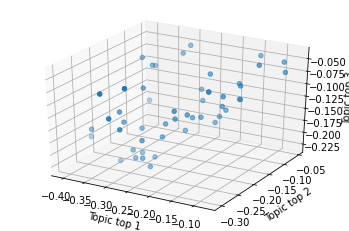

In [46]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_lsa_copy[:,0], X_lsa_copy[:,1], X_lsa_copy[:,2], marker='o')

ax.set_xlabel('Topic top 1')
ax.set_ylabel('Topic top 2')
ax.set_zlabel('Topic top 3')

plt.show()

(50, 20)


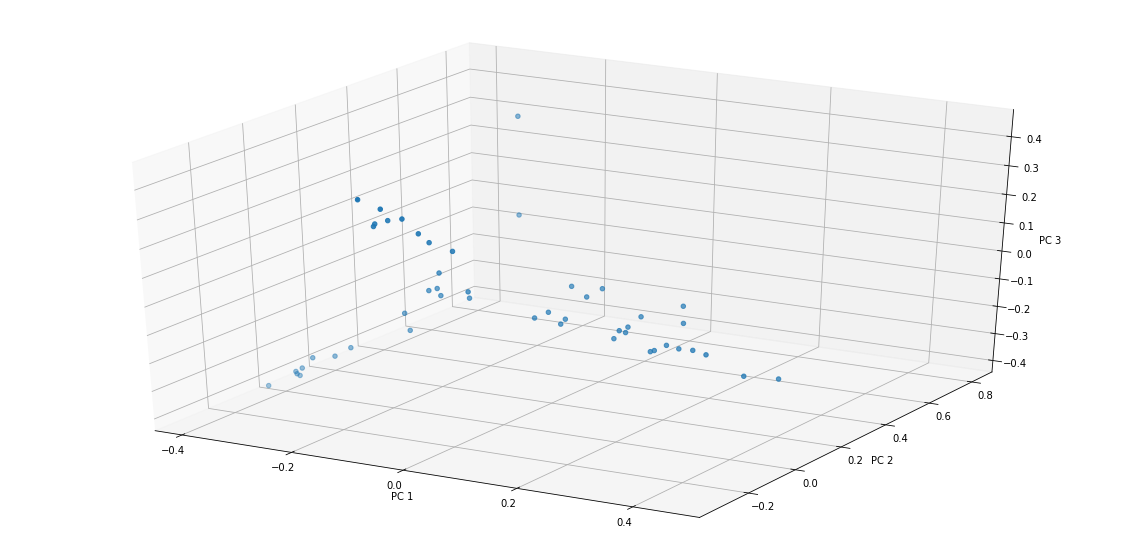

In [47]:
# Aplicando PCA para análise semântica dos documentos
from sklearn.decomposition import PCA

X_lsa_3d = PCA(n_components=20, random_state=0).fit_transform(X_lsa)
print(X_lsa_3d.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_lsa_3d[:,0], X_lsa_3d[:,1], X_lsa_3d[:,2], marker='o')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()

# Transformando o texto de uma query em vetores de características

In [48]:
# Pre processamento
final_list_stop_words = list_stop + custom_list_stop
query = 'pode o covid esta presente na historia antiga'

query_tokens = [token for token in word_tokenize(query, language='english') if not token in final_list_stop_words]
print(query_tokens)
pre_processed_query = ' '.join(query_tokens)
print(pre_processed_query)

# Extração de características de contagem
X_query = count_vect.transform([pre_processed_query])
print('1a etapa de extração de características')
print(X_query)

# Extração de características de frequência TF-IDF
X_tfidf_query = tfidf_transformer.transform(X_query)
print('2a etapa de extração de características')
print(X_tfidf_query)

# Extração dos embeddings da query
X_lsa_query = svd.transform(X_tfidf_query)
print('3a etapa de extração de características')
print(X_lsa_query)



['pode', 'covid', 'presente', 'historia', 'antiga']
pode covid presente historia antiga
1a etapa de extração de características
  (0, 689)	1
  (0, 721)	1
2a etapa de extração de características
  (0, 721)	0.6336971311090583
  (0, 689)	0.7735812472029999
3a etapa de extração de características
[[ 0.02979405 -0.00887641 -0.00861933  0.0003143   0.01523046  0.00169848
   0.04792157  0.00602748 -0.01324463  0.02435563 -0.02907319  0.01446424
   0.00067087  0.0036858  -0.02124095  0.01102613  0.00982519 -0.00147025
  -0.01825441 -0.01299491]]


# Recuperar documentos mais relevantes dada uma query

In [49]:
print(X_lsa_query.shape)

(1, 20)


In [50]:
# Matriz de vetores dos documentos -> X_lsa
# Vetor da query -> X_lsa_query
# Recuperar k documentos mais relevantes a query
k = 3

ouput_distances = pairwise_distances(X_lsa, X_lsa_query, metric='euclidean')[:,0]
sorted_distances = list(sorted(ouput_distances))[:k]
sorted_indexes = list(np.argsort(ouput_distances)[:k])

print(query)
for id_doc, dist in zip(sorted_indexes, sorted_distances):
    print('Doc id: ', id_doc, ' Distance: ', dist)

pode o covid esta presente na historia antiga
Doc id:  16  Distance:  0.5625215399003114
Doc id:  31  Distance:  0.5866456766665431
Doc id:  35  Distance:  0.5932062892291194


In [51]:
# Matriz de vetores dos documentos -> X_tfidf
# Vetor da query -> X_tfidf_query
# Recuperar k documentos mais relevantes a query
k = 3

ouput_distances = pairwise_distances(X_tfidf, X_tfidf_query, metric='euclidean')[:,0]
sorted_distances = list(sorted(ouput_distances))[:k]
sorted_indexes = list(np.argsort(ouput_distances)[:k])

print('Distância usando TF-IDF')
print(query)
for id_doc, dist in zip(sorted_indexes, sorted_distances):
    print('Doc id: ', id_doc, ' Distance: ', dist)

Distância usando TF-IDF
pode o covid esta presente na historia antiga
Doc id:  39  Distance:  1.3324768931869386
Doc id:  26  Distance:  1.347463594086062
Doc id:  5  Distance:  1.3857812260501683


In [52]:
# Matriz de vetores dos documentos -> X
# Vetor da query -> X_query
# Recuperar k documentos mais relevantes a query
k = 3

ouput_distances = pairwise_distances(X, X_query, metric='euclidean')[:,0]
sorted_distances = list(sorted(ouput_distances))[:k]
sorted_indexes = list(np.argsort(ouput_distances)[:k])

print('Distância usando Count Vectorizer')
print(query)
for id_doc, dist in zip(sorted_indexes, sorted_distances):
    print('Doc id: ', id_doc, ' Distance: ', dist)

Distância usando Count Vectorizer
pode o covid esta presente na historia antiga
Doc id:  10  Distance:  7.211102550927978
Doc id:  11  Distance:  7.211102550927978
Doc id:  22  Distance:  9.38083151964686


# Construindo um classificador de texto

In [53]:
rf_clf_tfidf = RandomForestClassifier(n_estimators=500, n_jobs=-1, max_features=5, max_depth=5, oob_score=True, verbose=2, random_state=0)

In [54]:
y = list(thesis.subject.copy())
rf_clf_tfidf.fit(X_tfidf, y)

building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500building tree 14 of 500

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s




building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500building tree 37 of 500

building tree 38 of 500
building tree 39 of 500
building tree 40 of 500building tree 41 of 500

building tree 42 of 500building tree 43 of 500

building tree 44 of 500building tree 45 of 500

building tree 46 of 500building tree 47 of 500

building tree 48 of 500building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500

building tree 

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    0.3s


building tree 215 of 500
building tree 216 of 500
building tree 217 of 500
building tree 218 of 500
building tree 219 of 500
building tree 220 of 500
building tree 221 of 500
building tree 222 of 500
building tree 223 of 500
building tree 224 of 500
building tree 225 of 500
building tree 226 of 500
building tree 227 of 500
building tree 228 of 500
building tree 229 of 500
building tree 230 of 500building tree 231 of 500

building tree 232 of 500
building tree 233 of 500
building tree 234 of 500building tree 235 of 500
building tree 236 of 500

building tree 237 of 500
building tree 238 of 500
building tree 239 of 500building tree 240 of 500

building tree 241 of 500
building tree 242 of 500
building tree 243 of 500
building tree 244 of 500
building tree 245 of 500
building tree 246 of 500building tree 247 of 500

building tree 248 of 500building tree 249 of 500
building tree 250 of 500

building tree 251 of 500
building tree 252 of 500building tree 253 of 500

building tree 254 of 500


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:    0.8s


building tree 405 of 500
building tree 406 of 500
building tree 407 of 500

building tree 408 of 500
building tree 409 of 500building tree 410 of 500

building tree 411 of 500
building tree 412 of 500building tree 413 of 500

building tree 414 of 500
building tree 415 of 500
building tree 416 of 500
building tree 417 of 500
building tree 418 of 500
building tree 419 of 500
building tree 420 of 500
building tree 421 of 500building tree 422 of 500

building tree 423 of 500
building tree 424 of 500
building tree 425 of 500
building tree 426 of 500
building tree 427 of 500building tree 428 of 500

building tree 429 of 500
building tree 430 of 500
building tree 431 of 500
building tree 432 of 500
building tree 433 of 500
building tree 434 of 500
building tree 435 of 500building tree 436 of 500

building tree 437 of 500
building tree 438 of 500
building tree 439 of 500
building tree 440 of 500
building tree 441 of 500
building tree 442 of 500
building tree 443 of 500
building tree 444 of 500

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished


RandomForestClassifier(max_depth=5, max_features=5, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=0, verbose=2)

In [55]:
print(rf_clf_tfidf.feature_importances_)

[4.65038235e-04 1.43705001e-03 6.38240716e-04 1.74812859e-03
 5.58195489e-05 0.00000000e+00 4.91373353e-04 8.98110933e-04
 1.84358884e-03 1.11644596e-03 1.26738940e-03 4.36864817e-04
 7.08429423e-04 6.26179321e-04 2.57049856e-04 2.71783181e-04
 3.26250902e-04 2.20674854e-04 4.02812525e-04 2.01028999e-04
 1.34846048e-03 2.93744155e-04 5.51013339e-04 8.46399061e-04
 7.67950769e-04 1.14191731e-04 0.00000000e+00 3.68533338e-04
 5.09327433e-04 0.00000000e+00 0.00000000e+00 7.53177861e-04
 3.81852378e-04 1.94680044e-03 0.00000000e+00 1.01756017e-03
 3.87695571e-04 2.71277723e-04 5.56596496e-04 1.21236348e-03
 2.73872558e-05 8.00883856e-04 9.79574086e-04 2.02264579e-03
 6.59695148e-04 1.73253171e-03 3.78633736e-03 1.97275795e-04
 3.06491921e-03 1.49294331e-03 7.24999648e-04 4.18272722e-03
 1.02383929e-03 1.00128300e-03 1.35135135e-05 2.90197178e-03
 7.54392395e-04 0.00000000e+00 2.33653490e-03 2.39765652e-04
 1.48069000e-03 0.00000000e+00 1.81532791e-03 0.00000000e+00
 1.63458924e-03 2.585873

In [56]:
min(rf_clf_tfidf.feature_importances_)

0.0

In [57]:
print('Média da acurácia das classes: ', rf_clf_tfidf.score(X_tfidf, y))

Média da acurácia das classes:  1.0


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.1s finished


## Treinando uma RandomForest com as features LSA (tópicos) dos documentos

In [58]:
rf_clf_lsa = RandomForestClassifier(n_estimators=500, n_jobs=-1, max_features=5, max_depth=5, oob_score=True, verbose=2, random_state=0)
rf_clf_lsa.fit(X_lsa, y)

building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500building tree 12 of 500

building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500

building tree 38 of 500
building tree 39 of 500building tree 40 of 500

building tree 41 of 500


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s


building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500building tree 53 of 500

building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500

building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500building tree 80 of 500
building tree 81 of 500

building tree 82 of 500
building tree 83

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    0.3s



building tree 256 of 500
building tree 257 of 500
building tree 258 of 500
building tree 259 of 500
building tree 260 of 500
building tree 261 of 500
building tree 262 of 500
building tree 263 of 500
building tree 264 of 500
building tree 265 of 500
building tree 266 of 500
building tree 267 of 500
building tree 268 of 500
building tree 269 of 500
building tree 270 of 500
building tree 271 of 500building tree 272 of 500

building tree 273 of 500
building tree 274 of 500
building tree 275 of 500
building tree 276 of 500
building tree 277 of 500building tree 278 of 500

building tree 279 of 500
building tree 280 of 500
building tree 281 of 500building tree 282 of 500

building tree 283 of 500
building tree 284 of 500
building tree 285 of 500building tree 286 of 500

building tree 287 of 500building tree 288 of 500

building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:    0.7s


building tree 460 of 500
building tree 461 of 500
building tree 462 of 500
building tree 463 of 500
building tree 464 of 500
building tree 465 of 500
building tree 466 of 500
building tree 467 of 500
building tree 468 of 500
building tree 469 of 500building tree 470 of 500

building tree 471 of 500
building tree 472 of 500
building tree 473 of 500building tree 474 of 500

building tree 475 of 500building tree 476 of 500

building tree 477 of 500building tree 478 of 500

building tree 479 of 500
building tree 480 of 500
building tree 481 of 500
building tree 482 of 500
building tree 483 of 500
building tree 484 of 500
building tree 485 of 500building tree 486 of 500
building tree 487 of 500
building tree 488 of 500

building tree 489 of 500
building tree 490 of 500building tree 491 of 500

building tree 492 of 500
building tree 493 of 500
building tree 494 of 500building tree 495 of 500

building tree 496 of 500
building tree 497 of 500
building tree 498 of 500
building tree 499 of 500b

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished


RandomForestClassifier(max_depth=5, max_features=5, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=0, verbose=2)

In [59]:
print(max(rf_clf_lsa.feature_importances_), min(rf_clf_lsa.feature_importances_))

0.18545320963770562 0.003997889839521897


In [60]:
print('Média da acurácia das classes: ', rf_clf_lsa.score(X_lsa, y))

Média da acurácia das classes:  1.0


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.1s finished


## Classificação de texto usando LSA

In [61]:
y = list(thesis.subject.copy())

X_train, X_test, y_train, y_test = train_test_split(X_lsa, y, test_size=0.33, random_state=0)

In [62]:
clf = RandomForestClassifier(random_state=0)

In [63]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [64]:
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [65]:
print("Train Dataset Metrics")
print(classification_report(y_train, y_pred_train))
print("--------------------------------")
print("Test Dataset Metrics")
print(classification_report(y_test, y_pred_test))

Train Dataset Metrics
                  precision    recall  f1-score   support

        biologia       1.00      1.00      1.00         5
        economia       1.00      1.00      1.00         7
     estatistica       1.00      1.00      1.00         6
        historia       1.00      1.00      1.00         6
machine+learning       1.00      1.00      1.00         9

        accuracy                           1.00        33
       macro avg       1.00      1.00      1.00        33
    weighted avg       1.00      1.00      1.00        33

--------------------------------
Test Dataset Metrics
                  precision    recall  f1-score   support

        biologia       1.00      1.00      1.00         5
        economia       1.00      1.00      1.00         3
     estatistica       1.00      0.50      0.67         4
        historia       0.67      1.00      0.80         4
machine+learning       1.00      1.00      1.00         1

        accuracy                           0.88  

## Pesquisa de documentos com LSA



In [66]:
def tokenizer(document, join=True):
    tokens = [unidecode(token.lower()) for token in word_tokenize(document, language='portuguese') if token not in list_stop and token.isalpha()]
    if join == True:
        tokens = " ".join(tokens)
        return tokens
    else:
        return tokens



In [67]:
tokenizer("pode o SARS covid esta presente na história antiga?")

'pode sars covid presente historia antiga'

In [68]:
def get_lsa_from_query(query):
    
    query = tokenizer(query)
    
    X_query = count_vect.transform([query])
    X_tfidf_query = tfidf_transformer.transform(X_query)
    X_lsa_query = svd.transform(X_tfidf_query)
    return X_lsa_query

In [69]:
def get_most_relevant_docs(query, n_documents, corpus):
    
    X_lsa_query = get_lsa_from_query(query)
    
    ouput_distances = pairwise_distances(corpus, X_lsa_query, metric='euclidean')[:,0]
    sorted_distances = list(sorted(ouput_distances))[:n_documents]
    sorted_indexes = list(np.argsort(ouput_distances)[:n_documents])
    
    print(f'Query: {query} \n')
    for id_doc, dist in zip(sorted_indexes, sorted_distances):
        print(f'Id: {id_doc}, Title: {thesis._get_value(id_doc, "title")}, Dist: {round(dist, 4)} \n')   



## Recuperar documentos mais relevantes dada uma query utilizando LSA

In [70]:
query = "covid"
n_documents = 5
corpus = X_lsa

get_most_relevant_docs(query, n_documents, corpus)

Query: covid 

Id: 18, Title: Testes de permutação e bootstrap em análise estatística de formas: aplicações a zoologia, Dist: 0.5811 

Id: 16, Title: Aplicativos que Abordam Conceitos Estatísticos em Tablets e Smartphones, Dist: 0.5898 

Id: 31, Title: Contribuições da audiodescrição para o ensino de células animais no ensino médio, Dist: 0.6291 

Id: 38, Title: Biologia populacional do caranguejo-uçá Ucides cordatus  (Linnaeus, 1763) (Crustaceae, Decapoda, Brachyura) no estuário do  rio Maracaípe, Ipojuca, PE, Dist: 0.6323 

Id: 35, Title: Primeiros socorros com ênfase no protagonismo discente : uma proposta de ensino por investigação na abordagem de conteúdos de biologia e saúde no ensino médio, Dist: 0.6341 



## Word2Vec

In [71]:
from gensim.test.utils import datapath
from gensim.models import Word2Vec
from gensim import utils
import multiprocessing

In [72]:
documents = thesis.title + thesis.abstract

documents_tokens = []
for document in documents:
    documents_tokens.append(tokenizer(document, join=False))


In [73]:
len(documents_tokens)

50

In [74]:
w2vec_model = Word2Vec(
          min_count=20,
          window=3,
          vector_size=20, 
          alpha=0.03, 
          min_alpha=0.0007, 
          negative=20,
          workers=4
        )

In [75]:
w2vec_model.build_vocab(corpus_iterable=documents_tokens)
w2vec_model.train(documents_tokens, total_examples=w2vec_model.corpus_count, epochs=50, report_delay=1)

(13555, 435950)

In [76]:
w2vec_model.get_latest_training_loss()

0.0

In [77]:
print("Tamanho do vocabulário: ", len(w2vec_model.wv))

Tamanho do vocabulário:  36


In [78]:
w2vec_model.predict_output_word(['historia'], topn=10)

[('historia', 0.039398674),
 ('aula', 0.03802973),
 ('medio', 0.03775039),
 ('partir', 0.03625985),
 ('professores', 0.036020655),
 ('sala', 0.035610974),
 ('matematica', 0.03544006),
 ('forma', 0.03528282),
 ('construcao', 0.034983363),
 ('biologia', 0.03485416)]

In [79]:
w2vec_model.wv['historia']

array([-0.11420801,  0.02437424, -0.02654472, -0.26821086,  0.23447463,
        0.38167813,  0.8472191 ,  1.1277658 , -0.456138  ,  0.12038396,
        0.48129967,  0.31432164, -0.3499061 , -0.36141083,  0.23030783,
        0.19978724,  0.9264379 , -0.76745373, -0.80409825, -0.45507514],
      dtype=float32)

In [80]:
w2vec_model.wv.most_similar('historia')

[('ensino', 0.9782739281654358),
 ('sala', 0.9766039252281189),
 ('aula', 0.9761922955513),
 ('professores', 0.9740358591079712),
 ('construcao', 0.9664080142974854),
 ('pesquisa', 0.9627724885940552),
 ('partir', 0.9584004878997803),
 ('analise', 0.9581626057624817),
 ('medio', 0.9546864032745361),
 ('estudantes', 0.9464429616928101)]

In [81]:
w2vec_model.wv.similarity('historia', 'machine')

0.4382061

## Text Classification

In [82]:
word_vec_dict = dict({})

for idex, key in enumerate(w2vec_model.wv.key_to_index):
    word_vec_dict[key] = w2vec_model.wv[key]
    
len(word_vec_dict)


36

In [83]:
doc = []

for document in range(len(documents_tokens)):
    doc_sentence = np.zeros(20)
    for word in range(len(documents_tokens[document])):
        word = documents_tokens[document][word]
        if word in word_vec_dict.keys():
            doc_sentence = np.add(doc_sentence, word_vec_dict[word])
            
    doc.append(doc_sentence)      

In [84]:
w2vec_df = pd.DataFrame(doc)

X_w2vec_train, X_w2vec_test, y_w2vec_train, y_w2vec_test = train_test_split(w2vec_df, y, test_size=0.33, random_state=0)

In [85]:
clf = RandomForestClassifier(random_state=0)

In [86]:
clf.fit(X_w2vec_train, y_w2vec_train)

RandomForestClassifier(random_state=0)

In [87]:
y_pred_train = clf.predict(X_w2vec_train)
y_pred_test = clf.predict(X_w2vec_test)


In [88]:
print("Train Dataset Metrics")
print(classification_report(y_w2vec_train, y_pred_train))
print("--------------------------------")
print("Test Dataset Metrics")
print(classification_report(y_w2vec_test, y_pred_test))



Train Dataset Metrics
                  precision    recall  f1-score   support

        biologia       1.00      1.00      1.00         5
        economia       1.00      1.00      1.00         7
     estatistica       1.00      1.00      1.00         6
        historia       1.00      1.00      1.00         6
machine+learning       1.00      1.00      1.00         9

        accuracy                           1.00        33
       macro avg       1.00      1.00      1.00        33
    weighted avg       1.00      1.00      1.00        33

--------------------------------
Test Dataset Metrics
                  precision    recall  f1-score   support

        biologia       0.40      0.40      0.40         5
        economia       1.00      1.00      1.00         3
     estatistica       0.33      0.25      0.29         4
        historia       0.50      0.50      0.50         4
machine+learning       0.50      1.00      0.67         1

        accuracy                           0.53  

## Recuperar documentos mais relevantes dada uma query utilizando Word2Vec

In [89]:
query = "covid"
n_documents = 5
corpus = w2vec_df

get_most_relevant_docs(query, n_documents, corpus)

Query: covid 

Id: 41, Title: Embarrassingly parallel autoconstructive multilayer perceptron neural networks, Dist: 0.0 

Id: 10, Title: APERFEIÇOAMENTO DE TESTES NOS MODELOS SÉRIES DE POTÊNCIA NÃO-LINEARES GENERALIZADOS, Dist: 8.5787 

Id: 11, Title: Aperfeiçoamento de testes nos modelos séries de  potência não-lineares generalizados, Dist: 8.5787 

Id: 40, Title: Time Aware Sigmoid Optimization : a new learning rate scheduling method, Dist: 10.2089 

Id: 46, Title: A machine learning-based methodology for automated classification of risks in an oil refinery, Dist: 11.063 



## Utilizar técnicas de decomposição ou redes neurais não vistas em sala na etapa de classificação, compare resultados com LSA e Word2Vec.

In [90]:
from sklearn.decomposition import KernelPCA

In [91]:
transformer = KernelPCA(n_components=20, kernel='linear')
X_transformed = transformer.fit_transform(X_tfidf)

In [92]:
y = list(thesis.subject.copy())

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.33, random_state=0)

In [93]:
clf = RandomForestClassifier(random_state=0)

In [94]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [95]:
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [96]:
print("Train Dataset Metrics")
print(classification_report(y_train, y_pred_train))
print("--------------------------------")
print("Test Dataset Metrics")
print(classification_report(y_test, y_pred_test))

Train Dataset Metrics
                  precision    recall  f1-score   support

        biologia       1.00      1.00      1.00         5
        economia       1.00      1.00      1.00         7
     estatistica       1.00      1.00      1.00         6
        historia       1.00      1.00      1.00         6
machine+learning       1.00      1.00      1.00         9

        accuracy                           1.00        33
       macro avg       1.00      1.00      1.00        33
    weighted avg       1.00      1.00      1.00        33

--------------------------------
Test Dataset Metrics
                  precision    recall  f1-score   support

        biologia       1.00      1.00      1.00         5
        economia       1.00      1.00      1.00         3
     estatistica       1.00      0.25      0.40         4
        historia       1.00      1.00      1.00         4
machine+learning       0.25      1.00      0.40         1

        accuracy                           0.82  

## Análise Final:

Comparando as acurácia dos modelos: 

Avaliando o resultado apresentado pelos modelos, o LSA obteve a melhor acurácia para representação dos textos.

LSA ==> accuracy 0.88

Word2Vec ==> accuracy 0.53

KernelPCA ==> accuracy 0.82